In [9]:
# from bagpy import bagreader
# import pandas as pd

# bag_path = "/home/daniel/Documents/data/daniel_baloo_data_collection/STAR/raw_bags/1to3/3.0time_50knots_1/seconds_3.0_trial1.bag"
# b = bagreader(bag_path)
# b.topic_table

# df_pressure_state = pd.read_csv(b.message_by_topic('/joint_0/pressure_state'))

[INFO]  Data folder /home/daniel/Documents/data/daniel_baloo_data_collection/STAR/raw_bags/1to3/3.0time_50knots_1/seconds_3.0_trial1 already exists. Not creating.


In [2]:
from bagpy import bagreader
from moldy.utils.bag_utils import bag_to_csv_data_collection
import os

# outer_path = "/home/daniel/Documents/data/daniel_baloo_data_collection/filtered_pressure_commands/STEPCMDS/"
outer_path = "/home/daniel/Documents/data/daniel_baloo_data_collection/noisy_pressure_data/"

topic_names = [["/left_arm/joint_0/angle_state", "/left_arm/joint_1/angle_state", "/left_arm/joint_2/angle_state"],
               ["/left_arm/joint_0/pressure_state", "/left_arm/joint_1/pressure_state", "/left_arm/joint_2/pressure_state"], 
               ["/left_arm/joint_0/pressure_command", "/left_arm/joint_1/pressure_command", "/left_arm/joint_2/pressure_command"],]

for experiment in os.listdir(outer_path):
    if experiment[-4:] == ".bag":
        print(f"Running experiment: {experiment}\n\n")
        try:
            save_path = f"{outer_path}/parsed_csvs/"+experiment.split(".")[0]+"/"
            os.makedirs(save_path, exist_ok=False)
            bag_dir = outer_path + experiment
            b = bagreader(bag_dir)

            bag_to_csv_data_collection(b, save_path, topic_names)
        except Exception as e:
            print(f"Failed on {experiment} with error: {e}")
            continue

Running experiment: trial4_hr.bag


[INFO]  Successfully created the data folder /home/daniel/Documents/data/daniel_baloo_data_collection/noisy_pressure_data/trial4_hr.
1719890007.9373658 1719893637.3960285 362949
Running experiment: trial7_30min.bag


[INFO]  Successfully created the data folder /home/daniel/Documents/data/daniel_baloo_data_collection/noisy_pressure_data/trial7_30min.
1719897502.3099136 1719899331.7640817 182884
Running experiment: trial5_upmore_30min.bag


[INFO]  Successfully created the data folder /home/daniel/Documents/data/daniel_baloo_data_collection/noisy_pressure_data/trial5_upmore_30min.
1719893699.2060573 1719895528.6697664 182947
Running experiment: trial0_30min.bag


[INFO]  Successfully created the data folder /home/daniel/Documents/data/daniel_baloo_data_collection/noisy_pressure_data/trial0_30min.
1719699996.9073846 1719701661.75675 166485
Running experiment: trial6_30min.bag


[INFO]  Successfully created the data folder /home/daniel/Documents/data/da

In [3]:
# Convert CSVs to numpy arrays in the correct format
import os
import numpy as np
from moldy.utils.bag_utils import get_data_from_csv
import pandas as pd

# import matplotlib.pyplot as plt
path_to_all_csvs = "/home/daniel/Documents/data/daniel_baloo_data_collection/STAR/parsed_csvs/"
# path_to_all_csvs = "/home/daniel/Documents/data/daniel_baloo_data_collection/CIRCLES/parsed_csvs/"


for experiment in os.listdir(path_to_all_csvs):
    if os.path.isdir(path_to_all_csvs+"/"+experiment) == False:
        continue

    list_df0 = []
    list_df1 = []
    list_df2 = []

    for trial in os.listdir(path_to_all_csvs+"/"+experiment):
        if os.path.isdir(path_to_all_csvs+"/"+experiment+"/"+trial) == False:
            continue

        df0 = pd.read_csv(path_to_all_csvs+"/"+experiment+"/" + trial + "/not_smooth_joint0.csv")
        df1 = pd.read_csv(path_to_all_csvs+"/"+experiment+"/" + trial + "/not_smooth_joint1.csv")
        df2 = pd.read_csv(path_to_all_csvs+"/"+experiment+"/" + trial + "/not_smooth_joint2.csv")

        list_df0.append(df0)
        list_df1.append(df1)
        list_df2.append(df2)
    

    df0s = pd.concat(list_df0)
    df1s = pd.concat(list_df1)
    df2s = pd.concat(list_df2)

    df0s.to_csv(path_to_all_csvs+"/"+experiment+"/not_smooth_joint0.csv", index=False)
    df1s.to_csv(path_to_all_csvs+"/"+experiment+"/not_smooth_joint1.csv", index=False)
    df2s.to_csv(path_to_all_csvs+"/"+experiment+"/not_smooth_joint2.csv", index=False)

    # t = df["time"].to_numpy()
    # u = df['u'].to_numpy()
    # v = df['v'].to_numpy()
    # udot = df['u_dot'].to_numpy()
    # vdot = df['v_dot'].to_numpy()
    # p0 = df['p0'].to_numpy()
    # p1 = df['p1'].to_numpy()
    # p2 = df['p2'].to_numpy()
    # p3 = df['p3'].to_numpy()
    # pc0 = df['p_cmd0'].to_numpy()
    # pc1 = df['p_cmd1'].to_numpy()
    # pc2 = df['p_cmd2'].to_numpy()
    # pc3 = df['p_cmd3'].to_numpy()
    #     not_smooth_joint0_data = get_data_from_csv(path_to_all_csvs+"/"+experiment+"/" + trial + "/not_smooth_joint0.csv")
    #     not_smooth_joint1_data = get_data_from_csv(path_to_all_csvs+"/"+experiment+"/" + trial + "/not_smooth_joint1.csv")
    #     not_smooth_joint2_data = get_data_from_csv(path_to_all_csvs+"/"+experiment+"/" + trial + "/not_smooth_joint2.csv")

In [14]:
# Convert CSVs to numpy arrays in the correct format
import os
import numpy as np
from moldy.utils.bag_utils import get_data_from_csv
from scipy.interpolate import PchipInterpolator


# path_to_all_csvs = "/home/daniel/Documents/data/daniel_baloo_data_collection/filtered_pressure_commands/STEPCMDS/parsed_csvs"
path_to_all_csvs = "/home/daniel/Documents/data/daniel_baloo_data_collection/noisy_pressure_data/parsed_csvs"
# path_to_all_csvs = "/home/daniel/Documents/data/daniel_baloo_data_collection/STAR/parsed_csvs/"
# path_to_all_csvs = "/home/daniel/Documents/data/daniel_baloo_data_collection/CIRCLES/parsed_csvs/"

not_smooth_data_list_inputs = []
not_smooth_data_list_outputs = []
for experiment in os.listdir(path_to_all_csvs):
    if os.path.isdir(path_to_all_csvs+"/"+experiment) == False:
        continue
    not_smooth_joint0_data = get_data_from_csv(path_to_all_csvs+"/"+experiment+"/not_smooth_joint0.csv")
    not_smooth_joint1_data = get_data_from_csv(path_to_all_csvs+"/"+experiment+"/not_smooth_joint1.csv")
    not_smooth_joint2_data = get_data_from_csv(path_to_all_csvs+"/"+experiment+"/not_smooth_joint2.csv")
    # for i in range(not_smooth_combined_state.shape[0]):

    # use pchip to interoplate the data from the not smooth data

    # new_t_range = np.arange(not_smooth_joint0_data[0, 0], not_smooth_joint0_data[-1, 0], 0.01)

    # not_smooth_combined_state = np.zeros((new_t_range.shape[0], 24))
    # not_smooth_combined_control_input = np.zeros((new_t_range.shape[0], 12))

    not_smooth_combined_state = np.zeros((not_smooth_joint0_data.shape[0], 24))
    not_smooth_combined_control_input = np.zeros((not_smooth_joint0_data.shape[0], 12))

    # for i in range(4):
    #     not_smooth_combined_state[:, i] = PchipInterpolator(not_smooth_joint0_data[:, 0], not_smooth_joint0_data[:, i+1])(new_t_range)
    #     not_smooth_combined_state[:, i+4] = PchipInterpolator(not_smooth_joint1_data[:, 0], not_smooth_joint1_data[:, i+1])(new_t_range)
    #     not_smooth_combined_state[:, i+8] = PchipInterpolator(not_smooth_joint2_data[:, 0], not_smooth_joint2_data[:, i+1])(new_t_range)

    # for i in range(2):
    #     not_smooth_combined_state[:, i+12] = PchipInterpolator(not_smooth_joint0_data[:, 0], not_smooth_joint0_data[:, i+5])(new_t_range)
    #     not_smooth_combined_state[:, i+14] = PchipInterpolator(not_smooth_joint1_data[:, 0], not_smooth_joint1_data[:, i+5])(new_t_range)
    #     not_smooth_combined_state[:, i+16] = PchipInterpolator(not_smooth_joint2_data[:, 0], not_smooth_joint2_data[:, i+5])(new_t_range)

    # for i in range(2):
    #     not_smooth_combined_state[:, i+18] = PchipInterpolator(not_smooth_joint0_data[:, 0], not_smooth_joint0_data[:, i+7])(new_t_range)
    #     not_smooth_combined_state[:, i+20] = PchipInterpolator(not_smooth_joint1_data[:, 0], not_smooth_joint1_data[:, i+7])(new_t_range)
    #     not_smooth_combined_state[:, i+22] = PchipInterpolator(not_smooth_joint2_data[:, 0], not_smooth_joint2_data[:, i+7])(new_t_range)

    # for i in range(4):
    #     not_smooth_combined_control_input[:, i] = PchipInterpolator(not_smooth_joint0_data[:, 0], not_smooth_joint0_data[:, i+9])(new_t_range)
    #     not_smooth_combined_control_input[:, i+4] = PchipInterpolator(not_smooth_joint1_data[:, 0], not_smooth_joint1_data[:, i+9])(new_t_range)
    #     not_smooth_combined_control_input[:, i+8] = PchipInterpolator(not_smooth_joint2_data[:, 0], not_smooth_joint2_data[:, i+9])(new_t_range)

    not_smooth_combined_state[:, :4] = not_smooth_joint0_data[:, 1:5]
    not_smooth_combined_state[:, 4:8] = not_smooth_joint1_data[:, 1:5]
    not_smooth_combined_state[:, 8:12] = not_smooth_joint2_data[:, 1:5]

    # # for i in range(not_smooth_combined_state.shape[0]):
    # #     for j in range(12):
    # #         if not_smooth_combined_state[i, j] < 0:
    # #             not_smooth_combined_state[i, j] = 0.0
                
    not_smooth_combined_state[:, 12:14] = -not_smooth_joint0_data[:, 5:7]
    not_smooth_combined_state[:, 14:16] = not_smooth_joint1_data[:, 5:7]
    not_smooth_combined_state[:, 16:18] = not_smooth_joint2_data[:, 5:7]

    not_smooth_combined_state[:, 18:20] = -not_smooth_joint0_data[:, 7:9]
    not_smooth_combined_state[:, 20:22] = not_smooth_joint1_data[:, 7:9]
    not_smooth_combined_state[:, 22:24] = not_smooth_joint2_data[:, 7:9]

    not_smooth_combined_control_input[:, :4] = not_smooth_joint0_data[:, -4:]
    not_smooth_combined_control_input[:, 4:8] = not_smooth_joint1_data[:, -4:]
    not_smooth_combined_control_input[:, 8:] = not_smooth_joint2_data[:, -4:]            

    not_smooth_input_data = np.concatenate((not_smooth_combined_state[:-1, :], not_smooth_combined_control_input[:-1, :]), axis=1)
    not_smooth_output_data = not_smooth_input_data[1:, :24] - not_smooth_input_data[:-1, :24]
    not_smooth_input_data = not_smooth_input_data[:-1, :]

    np.save(path_to_all_csvs+"/"+experiment+"/not_smooth_input.npy", not_smooth_input_data)
    np.save(path_to_all_csvs+"/"+experiment+"/not_smooth_output.npy", not_smooth_output_data)

    not_smooth_data_list_inputs.append(not_smooth_input_data)
    not_smooth_data_list_outputs.append(not_smooth_output_data)

not_smooth_data_list_inputs = np.concatenate(not_smooth_data_list_inputs, axis=0)
not_smooth_data_list_outputs = np.concatenate(not_smooth_data_list_outputs, axis=0)

print(f"not_smooth_data_list_inputs shape: {not_smooth_data_list_inputs.shape}", f"not_smooth_data_list_outputs shape: {not_smooth_data_list_outputs.shape}")

not_smooth_data_list_inputs shape: (1807046, 36) not_smooth_data_list_outputs shape: (1807046, 24)


In [12]:
not_smooth_combined_state.shape

(18295, 24)

In [14]:
not_smooth_joint0_data[1, 0] - not_smooth_joint0_data[0, 0]

0.0099999904632568

In [15]:
from scipy.signal import sosfiltfilt, butter

# def smooth_finite_diff(x, cutoff_freq=1.0):
#     sos = butter(8, cutoff_freq, output='sos', fs=100)
#     y = sosfiltfilt(sos, x)
#     return y


import pynumdiff
import pynumdiff.optimize

# smooth and numerically differentiate the pressure data
num_data_points = 20000

def smooth_finite_diff(x, dt=0.01, cutoff_frequency=1, num_data_points=20000, data_start=0):
    # estimate by (a) counting real # peaks per second in the data or (b) look at power spectra and choose cutoff. 
    # log_gamma = -1.6*np.log(cutoff_frequency) -0.71*np.log(dt) - 5.1
    # tvgamma = np.exp(log_gamma)   

    # params, val = pynumdiff.optimize.linear_model.savgoldiff(x[data_start:num_data_points+data_start], dt, params=None, 
    #                                                                 options={'iterate': True},
    #                                                                 tvgamma=tvgamma,
    #                                                                 dxdt_truth=None)
    # print('Optimal parameters: ', params)
    params = [5, 35, 15]
    # sos = butter(8, 1.25, output='sos', fs=100)
    # y = sosfiltfilt(sos, x)
    x_hat, dxdt_hat = pynumdiff.linear_model.savgoldiff(x, dt, params, options={'iterate': True})

    return x_hat, dxdt_hat

In [16]:
# read in all arrays, smooth them and then concatenate them into one big array
import os
import numpy as np

# path_to_all_csvs = "/home/daniel/Documents/data/daniel_baloo_data_collection/filtered_pressure_commands/STEPCMDS/parsed_csvs"
path_to_all_csvs = "/home/daniel/Documents/data/daniel_baloo_data_collection/noisy_pressure_data/parsed_csvs"
# path_to_all_csvs = "/home/daniel/Documents/data/daniel_baloo_data_collection/STAR/parsed_csvs"
# path_to_all_csvs = "/home/daniel/Documents/data/daniel_baloo_data_collection/CIRCLES/parsed_csvs/"


smooth_all_inputs_list = []
smooth_all_outputs_list = []

not_smooth_all_inputs_list = []
not_smooth_all_outputs_list = []

for experiment in os.listdir(path_to_all_csvs):
    if experiment[-3:] != "npy":
        not_smooth_input_data = np.load(path_to_all_csvs+"/"+experiment+"/not_smooth_input.npy")
        not_smooth_output_data = np.load(path_to_all_csvs+"/"+experiment+"/not_smooth_output.npy")

        smoothed_input_data = np.zeros(not_smooth_input_data.shape)
        smoothed_output_data = np.zeros(not_smooth_output_data.shape)

        for j in range(24):
            if j < 12:
                # smoothed_input_data[smoothed_input_data[:,j] < 0, j] = 0.0
                p_hat, pdot_hat = smooth_finite_diff(not_smooth_input_data[:, j])
                smoothed_input_data[:, j] = p_hat
            elif j < 18:
                continue
                # smoothed_input_data[:, j] = smooth_finite_diff(not_smooth_input_data[:, j], cutoff_freq=1.0)
            else:
                angle, angle_dot = smooth_finite_diff(not_smooth_input_data[:, j])
                smoothed_input_data[:, j] = angle
                smoothed_input_data[:, j-6] = angle_dot

        smoothed_input_data[:, -12:] = not_smooth_input_data[:, -12:]
        smoothed_output_data = smoothed_input_data[1:, :24] - smoothed_input_data[:-1, :24]
        smoothed_input_data = smoothed_input_data[:-1, :]

        smooth_all_inputs_list.append(smoothed_input_data)
        smooth_all_outputs_list.append(smoothed_output_data)

        not_smooth_all_inputs_list.append(not_smooth_input_data)
        not_smooth_all_outputs_list.append(not_smooth_output_data)

        np.save(path_to_all_csvs+"/"+experiment+"/smooth_input.npy", smoothed_input_data)
        np.save(path_to_all_csvs+"/"+experiment+"/smooth_output.npy", smoothed_output_data)

smooth_all_inputs = np.concatenate(smooth_all_inputs_list, axis=0)
smooth_all_outputs = np.concatenate(smooth_all_outputs_list, axis=0)

np.save(path_to_all_csvs+"/smooth_all_inputs.npy", smooth_all_inputs)
np.save(path_to_all_csvs+"/smooth_all_outputs.npy", smooth_all_outputs)

not_smooth_all_inputs = np.concatenate(not_smooth_all_inputs_list, axis=0)
not_smooth_all_outputs = np.concatenate(not_smooth_all_outputs_list, axis=0)

np.save(path_to_all_csvs+"/not_smooth_all_inputs.npy", not_smooth_all_inputs)
np.save(path_to_all_csvs+"/not_smooth_all_outputs.npy", not_smooth_all_outputs)

print(smooth_all_inputs.shape, not_smooth_all_inputs.shape, smooth_all_outputs.shape, not_smooth_all_outputs.shape)

(1807038, 36) (1807046, 36) (1807038, 24) (1807046, 24)


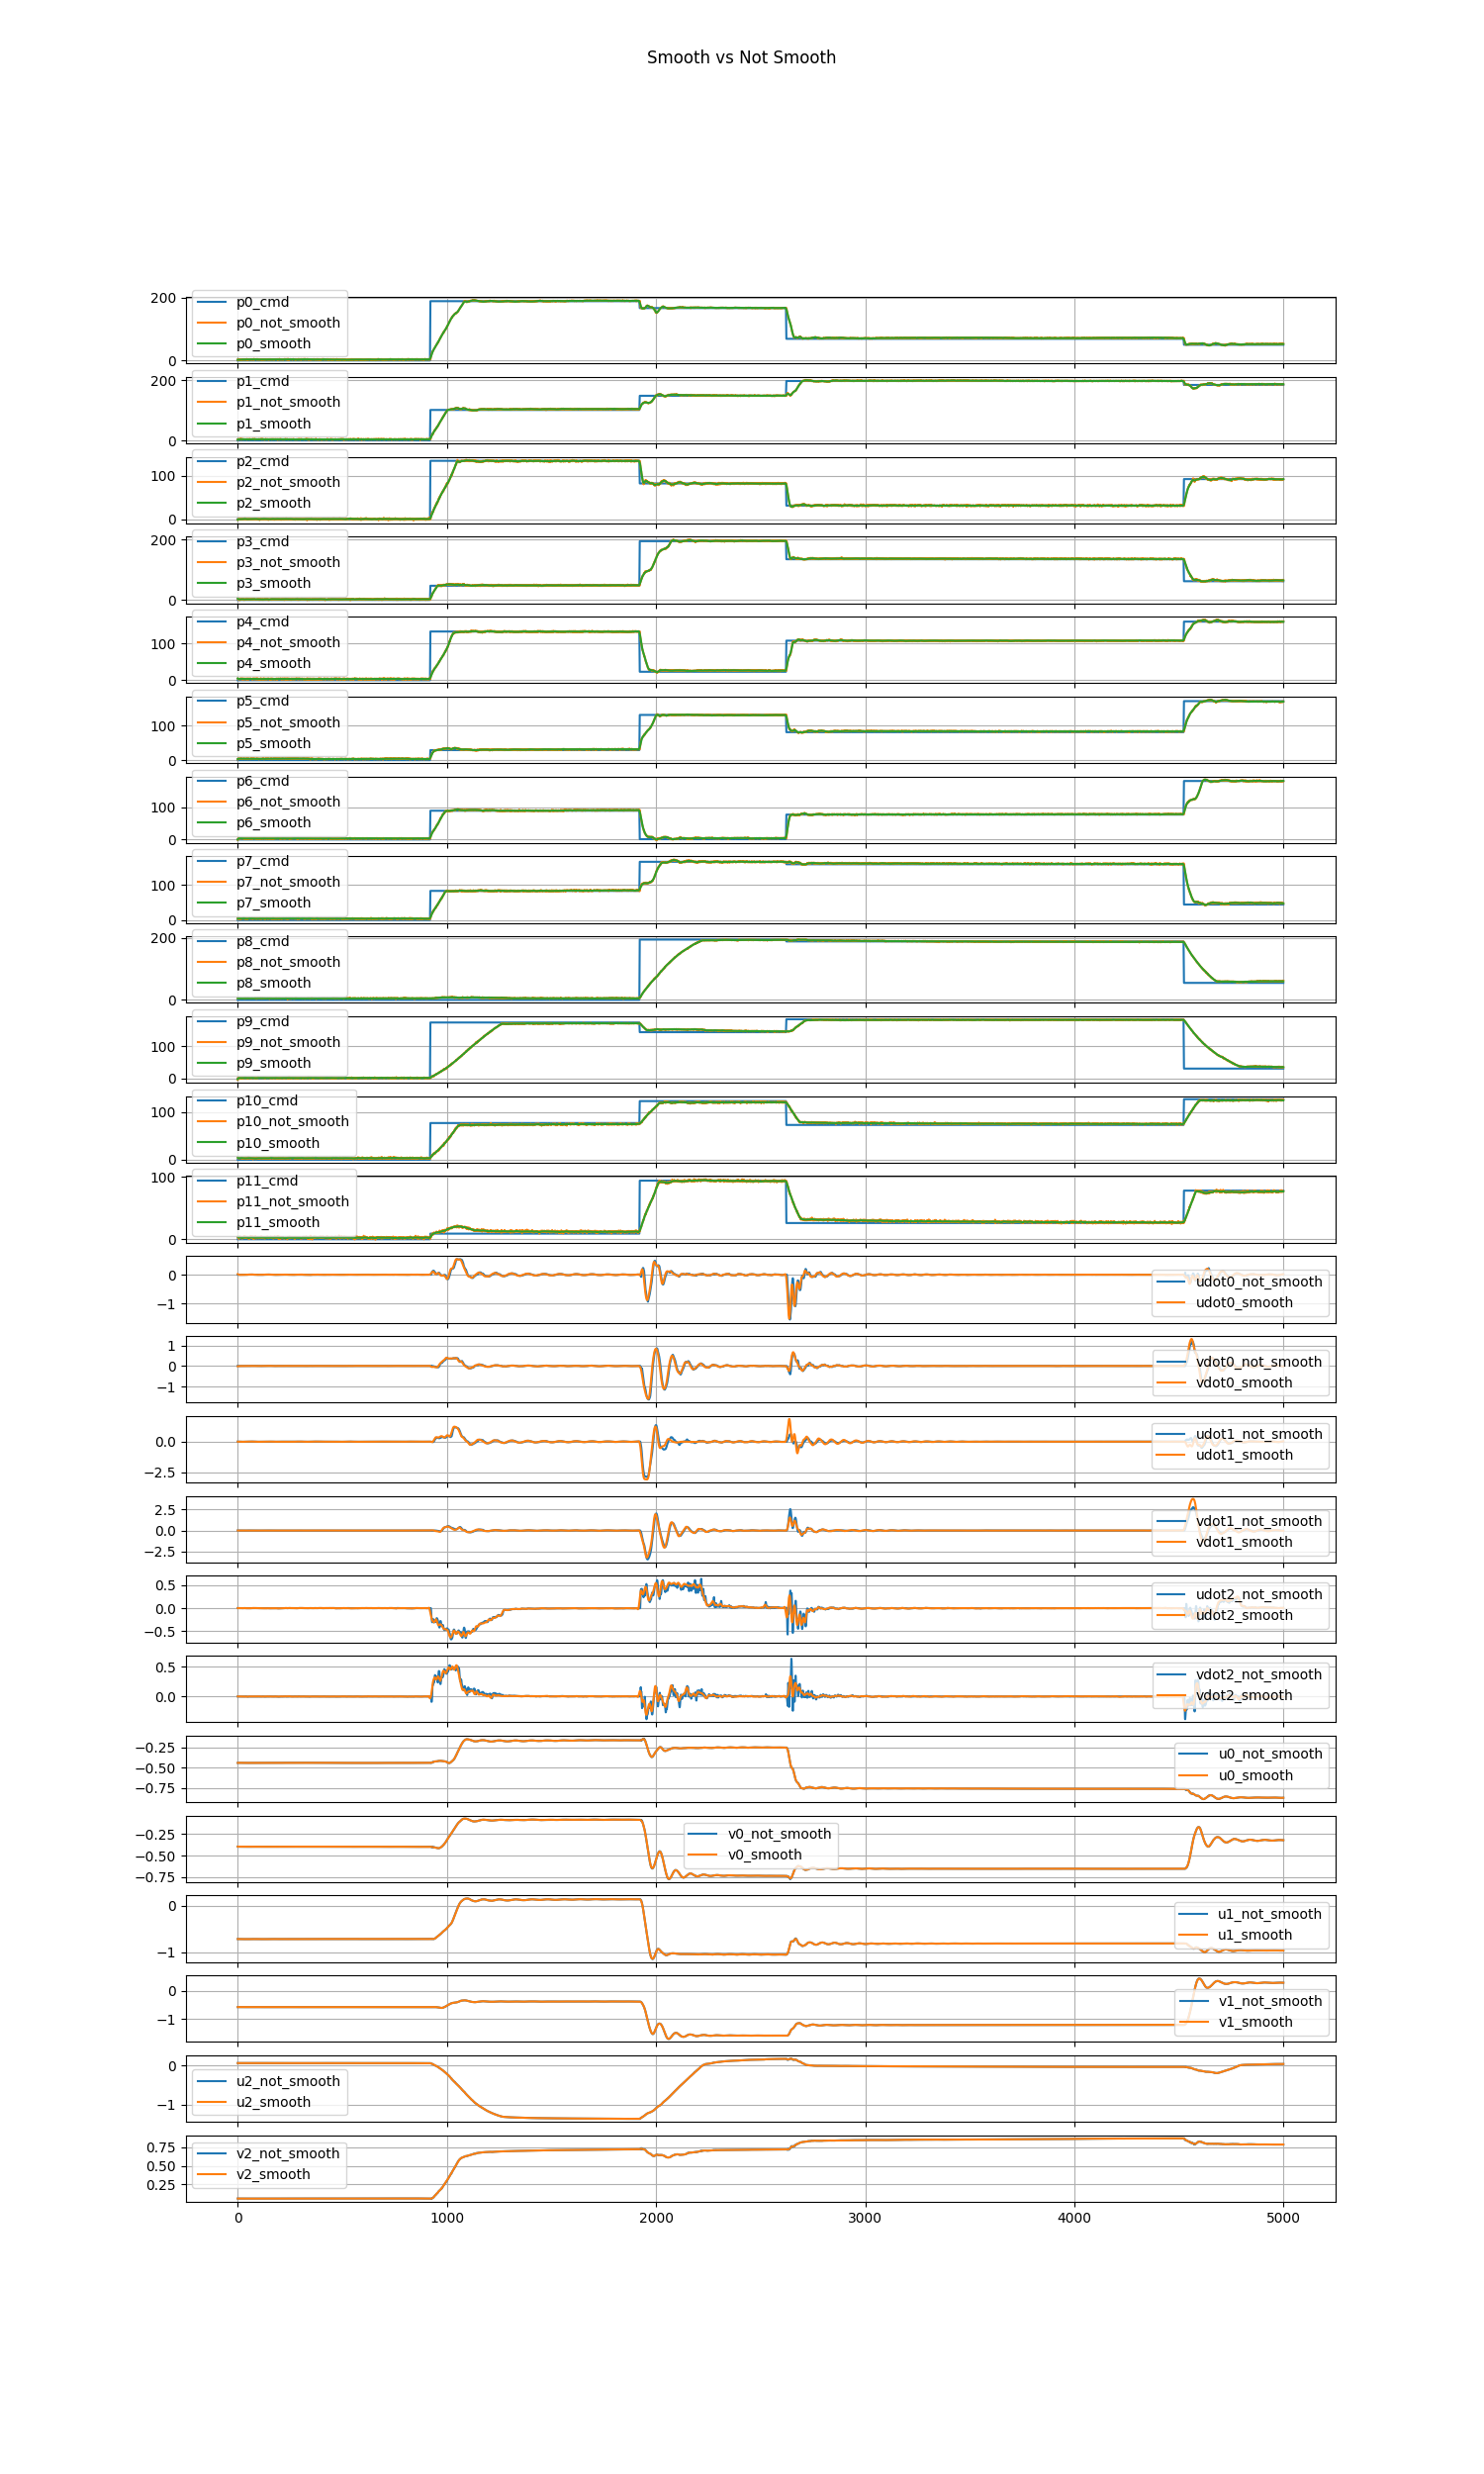

In [18]:
%matplotlib widget

# plot all of the states to compare smooth and not smooth
import matplotlib.pyplot as plt
import numpy as np

start_ind = 0
end_ind = 5000

# path_to_all_csvs = "/home/daniel/Documents/data/daniel_baloo_data_collection/filtered_pressure_commands/STEPCMDS/parsed_csvs"
path_to_all_csvs = "/home/daniel/Documents/data/daniel_baloo_data_collection/noisy_pressure_data/parsed_csvs"

# path_to_all_csvs = "/home/daniel/Documents/data/daniel_baloo_data_collection/STAR/parsed_csvs"
# path_to_all_csvs = "/home/daniel/Documents/data/daniel_baloo_data_collection/CIRCLES/parsed_csvs"

smooth_all_inputs = np.load(path_to_all_csvs+"/smooth_all_inputs.npy")
smooth_all_outputs = np.load(path_to_all_csvs+"/smooth_all_outputs.npy")

not_smooth_all_inputs = np.load(path_to_all_csvs+"/not_smooth_all_inputs.npy")
not_smooth_all_outputs = np.load(path_to_all_csvs+"/not_smooth_all_outputs.npy")

fig, axs = plt.subplots(24, 1, sharex=True, figsize=(15, 25))
fig.suptitle('Smooth vs Not Smooth')
labels = ["p0", "p1", "p2", "p3", "p4", "p5", "p6", "p7", "p8", "p9", "p10", "p11", "udot0", "vdot0", "udot1", "vdot1", "udot2", "vdot2", "u0", "v0", "u1", "v1", "u2", "v2"]

for i in range(12):
    axs[i].plot(smooth_all_inputs[start_ind:end_ind, i+24], label=f"{labels[i]}_cmd")
    axs[i].plot(not_smooth_all_inputs[start_ind:end_ind, i], label=f"{labels[i]}_not_smooth")
    axs[i].plot(smooth_all_inputs[start_ind:end_ind, i], label=f"{labels[i]}_smooth")
    axs[i].legend()
    axs[i].grid()

for i in range(12, 24):
    axs[i].plot(not_smooth_all_inputs[start_ind:end_ind, i], label=f"{labels[i]}_not_smooth")
    axs[i].plot(smooth_all_inputs[start_ind:end_ind, i], label=f"{labels[i]}_smooth")
    axs[i].legend()
    axs[i].grid()

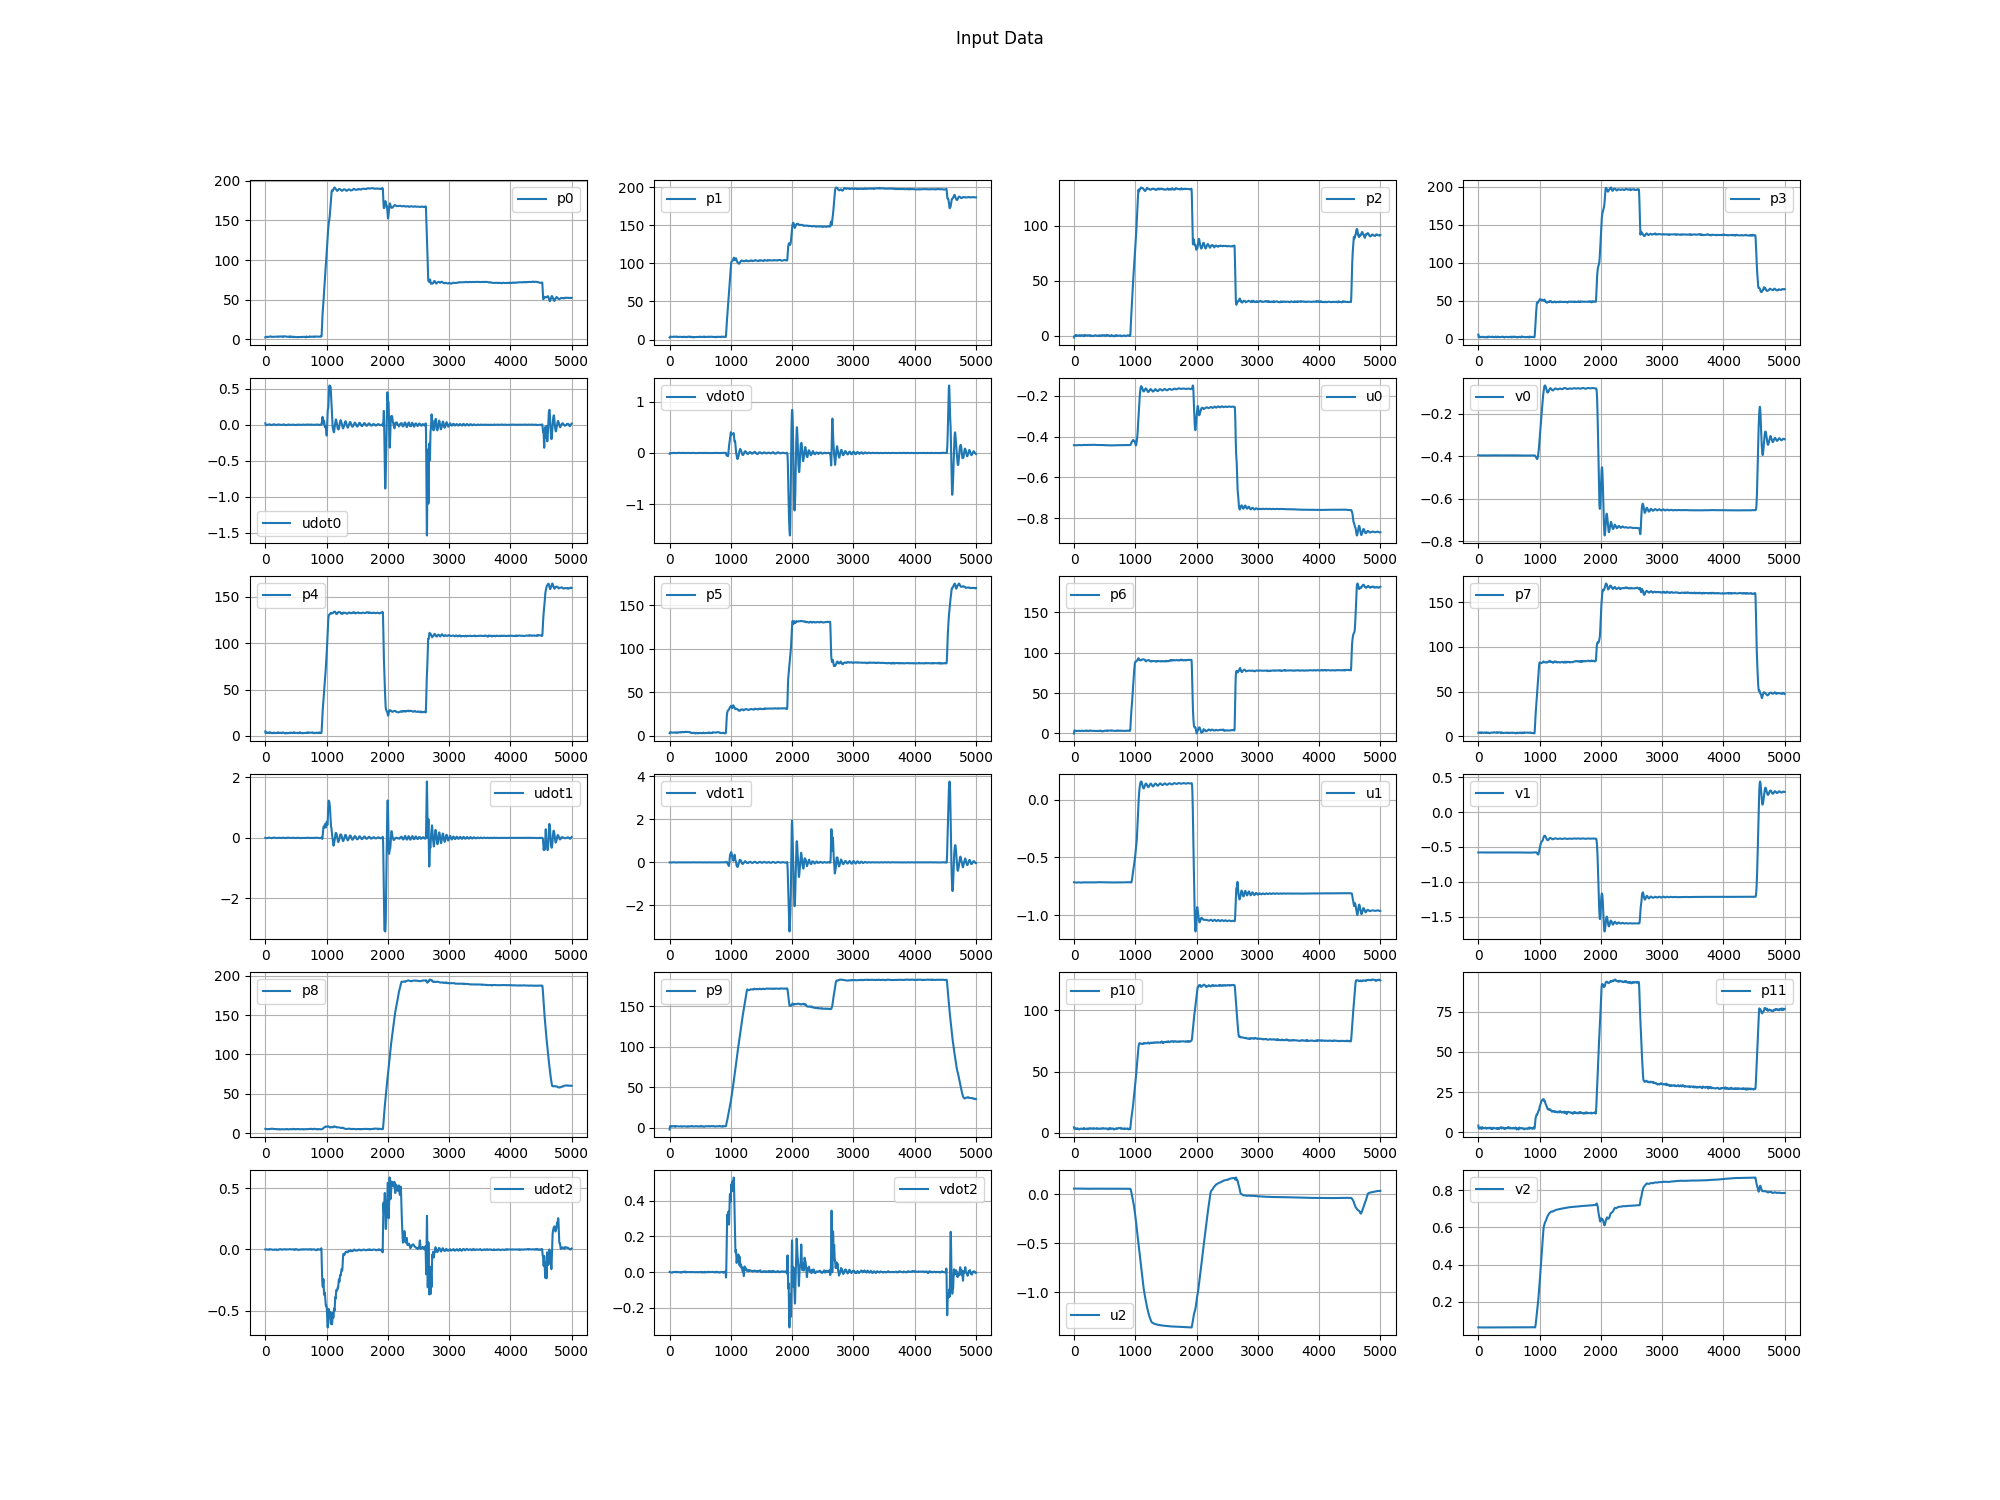

In [19]:
#Make sure the output data is correct 
%matplotlib widget
import matplotlib.pyplot as plt


fig, axs = plt.subplots(6, 4)
fig.set_size_inches(20, 15)
fig.suptitle('Input Data')
start = 0
end = 5000

arm_input_train_data = smooth_all_inputs
arm_output_train_data = smooth_all_outputs

# arm_input_train_data = not_smooth_all_inputs
# arm_output_train_data = not_smooth_all_outputs

integrated_arm_data = np.zeros((arm_input_train_data.shape[0], 24))

integrated_arm_data[0, :] = arm_input_train_data[0, :24]

for i in range(start+1, end):
    integrated_arm_data[i, :] = arm_output_train_data[i, :] + integrated_arm_data[i-1,:]

axs[0, 0].plot(arm_input_train_data[start:end,0], label='p0')
axs[0, 1].plot(arm_input_train_data[start:end,1], label='p1')
axs[0, 2].plot(arm_input_train_data[start:end,2], label='p2')
axs[0, 3].plot(arm_input_train_data[start:end,3], label='p3')

axs[1, 2].plot(arm_input_train_data[start:end,18], label='u0')
axs[1, 0].plot(arm_input_train_data[start:end,12], label='udot0')
axs[1, 3].plot(arm_input_train_data[start:end,19], label='v0')
axs[1, 1].plot(arm_input_train_data[start:end,13], label='vdot0')

axs[2, 0].plot(arm_input_train_data[start:end,4], label='p4')
axs[2, 1].plot(arm_input_train_data[start:end,5], label='p5')
axs[2, 2].plot(arm_input_train_data[start:end,6], label='p6')
axs[2, 3].plot(arm_input_train_data[start:end,7], label='p7')

axs[3, 2].plot(arm_input_train_data[start:end,20], label='u1')
axs[3, 0].plot(arm_input_train_data[start:end,14], label='udot1')
axs[3, 3].plot(arm_input_train_data[start:end,21], label='v1')
axs[3, 1].plot(arm_input_train_data[start:end,15], label='vdot1')

axs[4, 0].plot(arm_input_train_data[start:end,8], label='p8')
axs[4, 1].plot(arm_input_train_data[start:end,9], label='p9')
axs[4, 2].plot(arm_input_train_data[start:end,10], label='p10')
axs[4, 3].plot(arm_input_train_data[start:end,11], label='p11')

axs[5, 2].plot(arm_input_train_data[start:end,22], label='u2')
axs[5, 0].plot(arm_input_train_data[start:end,16], label='udot2')
axs[5, 3].plot(arm_input_train_data[start:end,23], label='v2')
axs[5, 1].plot(arm_input_train_data[start:end,17], label='vdot2')

# axs[0, 0].plot(integrated_arm_data[start:end,0], label='integrated p0')
# axs[0, 1].plot(integrated_arm_data[start:end,1], label='integrated p1')
# axs[0, 2].plot(integrated_arm_data[start:end,2], label='integrated p2')
# axs[0, 3].plot(integrated_arm_data[start:end,3], label='integrated p3')

# axs[1, 0].plot(integrated_arm_data[start:end,12], label='integrated udot0')
# axs[1, 1].plot(integrated_arm_data[start:end,13], label='integrated vdot0')
# axs[1, 2].plot(integrated_arm_data[start:end,18], label='integrated u0')
# axs[1, 3].plot(integrated_arm_data[start:end,19], label='integrated v0')

# axs[2, 0].plot(integrated_arm_data[start:end,4], label='integrated p4')
# axs[2, 1].plot(integrated_arm_data[start:end,5], label='integrated p5')
# axs[2, 2].plot(integrated_arm_data[start:end,6], label='integrated p6')
# axs[2, 3].plot(integrated_arm_data[start:end,7], label='integrated p7')

# axs[3, 0].plot(integrated_arm_data[start:end,14], label='integrated udot1')
# axs[3, 1].plot(integrated_arm_data[start:end,15], label='integrated vdot1')
# axs[3, 2].plot(integrated_arm_data[start:end,20], label='integrated u1')
# axs[3, 3].plot(integrated_arm_data[start:end,21], label='integrated v1')

# axs[4, 0].plot(integrated_arm_data[start:end,8], label='integrated p8')
# axs[4, 1].plot(integrated_arm_data[start:end,9], label='integrated p9')
# axs[4, 2].plot(integrated_arm_data[start:end,10], label='integrated p10')
# axs[4, 3].plot(integrated_arm_data[start:end,11], label='integrated p11')

# axs[5, 0].plot(integrated_arm_data[start:end,16], label='integrated udot2')
# axs[5, 1].plot(integrated_arm_data[start:end,17], label='integrated vdot2')
# axs[5, 2].plot(integrated_arm_data[start:end,22], label='integrated u2')
# axs[5, 3].plot(integrated_arm_data[start:end,23], label='integrated v2')


for ax in axs.flat:
    ax.legend()
    ax.grid(True)

In [20]:
from moldy.case_studies.baloo_left_hw.learnedModel_baloo_hw import LearnedModel_BalooHW

import numpy as np

model = LearnedModel_BalooHW()

# path_to_all_csvs = "/home/daniel/Documents/data/daniel_baloo_data_collection/filtered_pressure_commands/STEPCMDS/parsed_csvs"
path_to_all_csvs = "/home/daniel/Documents/data/daniel_baloo_data_collection/noisy_pressure_data/parsed_csvs"
# path_to_all_csvs = "/home/daniel/Documents/data/daniel_baloo_data_collection/STAR/parsed_csvs"
# path_to_all_csvs = "/home/daniel/Documents/data/daniel_baloo_data_collection/CIRCLES/parsed_csvs"

smooth_all_inputs = np.load(path_to_all_csvs+"/smooth_all_inputs.npy")
smooth_all_outputs = np.load(path_to_all_csvs+"/smooth_all_outputs.npy")

not_smooth_all_inputs = np.load(path_to_all_csvs+"/not_smooth_all_inputs.npy")
not_smooth_all_outputs = np.load(path_to_all_csvs+"/not_smooth_all_outputs.npy")

# state_mean = ((model.xMax + model.xMin) / 2).cpu().numpy()
# state_std = ((model.xMax - model.xMin) / 2).cpu().numpy()
# input_mean = ((model.uMax + model.uMin) / 2).cpu().numpy()
# input_std = ((model.uMax - model.uMin) / 2).cpu().numpy()

# all_smooth_inputs_normalized[:, :24] = (smooth_all_inputs[:, :24] - state_mean) / state_std
# all_smooth_inputs_normalized[:, 24:] = (smooth_all_inputs[:, 24:] - input_mean) / input_std
# all_smooth_outputs_normalized = (smooth_all_outputs - state_mean) / state_std


# all_not_smooth_inputs_normalized[:, :24] = (not_smooth_all_inputs[:, :24] - state_mean) / state_std
# all_not_smooth_inputs_normalized[:, 24:] = (not_smooth_all_inputs[:, 24:] - input_mean) / input_std
# all_not_smooth_outputs_normalized = (not_smooth_all_outputs - state_mean) / state_std

filtered_smooth_inputs = []
filtered_not_smooth_inputs = []

for i in range(smooth_all_inputs.shape[0]):
    if (np.max(smooth_all_inputs[i, :24]) < 225).all() and (np.min(smooth_all_inputs[i, :24]) > -3).all():
        filtered_smooth_inputs.append(i)

for i in range(not_smooth_all_inputs.shape[0]):
    if (np.max(not_smooth_all_inputs[i, :24]) < 225).all() and (np.min(not_smooth_all_inputs[i, :24]) > -3).all():
        filtered_not_smooth_inputs.append(i)

clean_smooth_inputs = smooth_all_inputs[filtered_smooth_inputs]
clean_smooth_outputs = smooth_all_outputs[filtered_smooth_inputs]

clean_not_smooth_inputs = not_smooth_all_inputs[filtered_not_smooth_inputs]
clean_not_smooth_outputs = not_smooth_all_outputs[filtered_not_smooth_inputs]

input_max = model.xMax.cpu().numpy()
command_max = model.uMax.cpu().numpy()
output_max = np.max(clean_smooth_outputs, axis=0)

all_smooth_inputs_normalized = np.zeros(clean_smooth_inputs.shape)
all_smooth_outputs_normalized = np.zeros(clean_smooth_outputs.shape)

all_not_smooth_inputs_normalized = np.zeros(clean_not_smooth_inputs.shape)
all_not_smooth_outputs_normalized = np.zeros(clean_not_smooth_outputs.shape)

all_smooth_inputs_normalized[:, :24] = clean_smooth_inputs[:, :24] / input_max
all_smooth_inputs_normalized[:, 24:] = clean_smooth_inputs[:, 24:] / command_max
all_smooth_outputs_normalized = clean_smooth_outputs / output_max

all_not_smooth_inputs_normalized[:, :24] = clean_not_smooth_inputs[:, :24] / input_max
all_not_smooth_inputs_normalized[:, 24:] = clean_not_smooth_inputs[:, 24:] / command_max
all_not_smooth_outputs_normalized = clean_not_smooth_outputs / output_max

np.save(path_to_all_csvs+"/smooth_all_inputs_normalized.npy", all_smooth_inputs_normalized)
np.save(path_to_all_csvs+"/smooth_all_outputs_normalized.npy", all_smooth_outputs_normalized)

np.save(path_to_all_csvs+"/not_smooth_all_inputs_normalized.npy", all_not_smooth_inputs_normalized)
np.save(path_to_all_csvs+"/not_smooth_all_outputs_normalized.npy", all_not_smooth_outputs_normalized)

In [20]:
output_max

array([4.96744271e+00, 7.73854985e+02, 4.74237889e+03, 1.07010681e+01,
       5.20601625e+02, 5.00703884e+00, 9.30473832e+00, 2.60225045e+02,
       9.23880678e+01, 1.68611213e+02, 1.26731280e+01, 9.64590590e+00,
       1.87913504e-01, 1.62918169e-01, 4.76113534e-01, 4.81898155e-01,
       7.95012044e-01, 3.78547682e-01, 2.49107580e-02, 2.69783900e-02,
       4.71593790e-02, 4.82109704e-02, 5.32213201e-02, 1.98110711e-02])

In [21]:
# remove outliers from the data
from scipy import stats
import numpy as np

# path_to_all_csvs = "/home/daniel/Documents/data/daniel_baloo_data_collection/filtered_pressure_commands/STEPCMDS/parsed_csvs"
path_to_all_csvs = "/home/daniel/Documents/data/daniel_baloo_data_collection/noisy_pressure_data/parsed_csvs"
# path_to_all_csvs = "/home/daniel/Documents/data/daniel_baloo_data_collection/STAR/parsed_csvs"
# path_to_all_csvs = "/home/daniel/Documents/data/daniel_baloo_data_collection/CIRCLES/parsed_csvs"

all_smooth_inputs_normalized = np.load(f"{path_to_all_csvs}/smooth_all_inputs_normalized.npy")
all_smooth_outputs_normalized = np.load(f"{path_to_all_csvs}/smooth_all_outputs_normalized.npy")

z_scores = stats.zscore(all_smooth_inputs_normalized)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 6).all(axis=1)
all_smooth_inputs_normalized_filtered = all_smooth_inputs_normalized[filtered_entries]
all_smooth_outputs_normalized_filtered = all_smooth_outputs_normalized[filtered_entries]

z_scores = stats.zscore(all_smooth_outputs_normalized_filtered)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 6).all(axis=1)
all_smooth_inputs_normalized_filtered = all_smooth_inputs_normalized_filtered[filtered_entries]
all_smooth_outputs_normalized_filtered = all_smooth_outputs_normalized_filtered[filtered_entries]

all_not_smooth_inputs_normalized = np.load(f"{path_to_all_csvs}/not_smooth_all_inputs_normalized.npy")
all_not_smooth_outputs_normalized = np.load(f"{path_to_all_csvs}/not_smooth_all_outputs_normalized.npy")

z_scores = stats.zscore(all_not_smooth_inputs_normalized)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 6).all(axis=1)
all_not_smooth_inputs_normalized_filtered = all_not_smooth_inputs_normalized[filtered_entries]
all_not_smooth_outputs_normalized_filtered = all_not_smooth_outputs_normalized[filtered_entries]

z_scores = stats.zscore(all_not_smooth_outputs_normalized_filtered)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 6).all(axis=1)
all_not_smooth_inputs_normalized_filtered = all_not_smooth_inputs_normalized_filtered[filtered_entries]
all_not_smooth_outputs_normalized_filtered = all_not_smooth_outputs_normalized_filtered[filtered_entries]

np.save(f"{path_to_all_csvs}/smooth_all_inputs_normalized_filtered.npy", all_smooth_inputs_normalized_filtered)
np.save(f"{path_to_all_csvs}/smooth_all_outputs_normalized_filtered.npy", all_smooth_outputs_normalized_filtered)

np.save(f"{path_to_all_csvs}/not_smooth_all_inputs_normalized_filtered.npy", all_not_smooth_inputs_normalized_filtered)
np.save(f"{path_to_all_csvs}/not_smooth_all_outputs_normalized_filtered.npy", all_not_smooth_outputs_normalized_filtered)

print(all_smooth_inputs_normalized_filtered.shape, all_smooth_outputs_normalized_filtered.shape, all_not_smooth_inputs_normalized_filtered.shape, all_not_smooth_outputs_normalized_filtered.shape)

(1682309, 36) (1682309, 24) (1701682, 36) (1701682, 24)


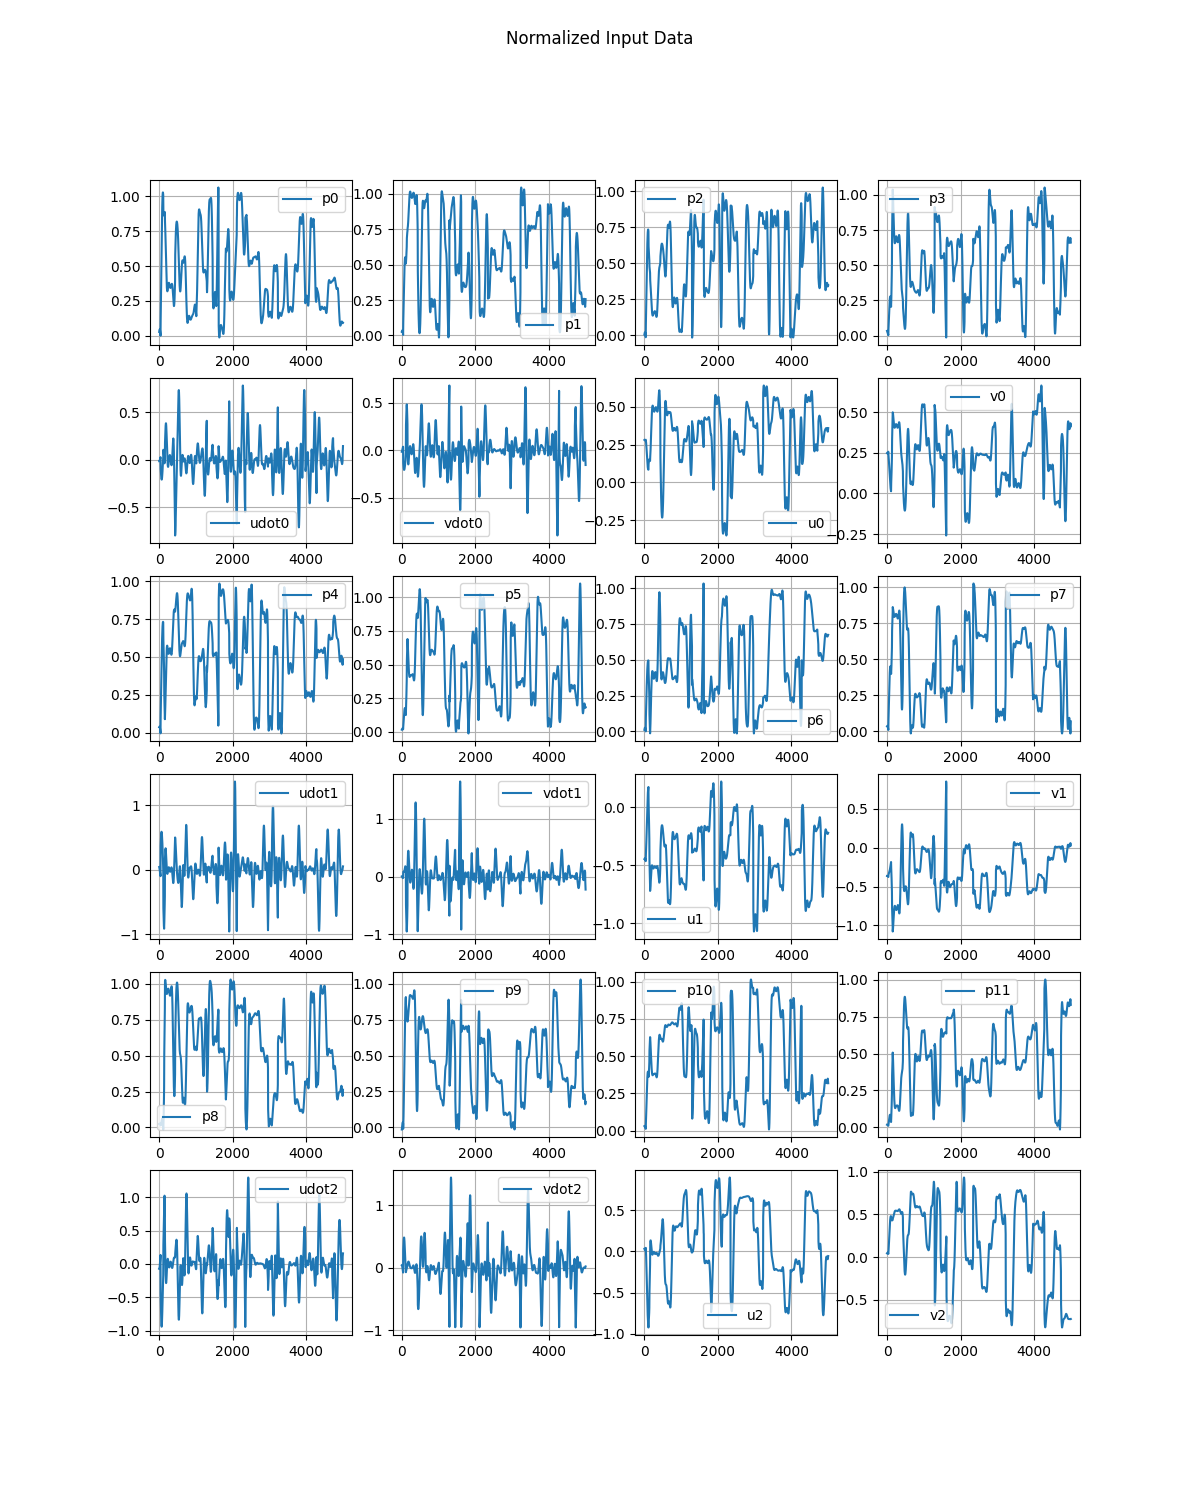

In [21]:
# plot the normalized inputs
%matplotlib widget
import matplotlib.pyplot as plt
fig, axs = plt.subplots(6, 4)
fig.set_size_inches(12, 15)
fig.suptitle('Normalized Input Data')
start = 0
end = 5000

all_inputs_normalized_filtered = np.load(f"{path_to_all_csvs}/smooth_all_inputs_normalized.npy")

axs[0, 0].plot(all_inputs_normalized_filtered[start:end,0], label='p0')
axs[0, 1].plot(all_inputs_normalized_filtered[start:end,1], label='p1')
axs[0, 2].plot(all_inputs_normalized_filtered[start:end,2], label='p2')
axs[0, 3].plot(all_inputs_normalized_filtered[start:end,3], label='p3')

axs[1, 0].plot(all_inputs_normalized_filtered[start:end,12], label='udot0')
axs[1, 1].plot(all_inputs_normalized_filtered[start:end,13], label='vdot0')
axs[1, 2].plot(all_inputs_normalized_filtered[start:end,18], label='u0')
axs[1, 3].plot(all_inputs_normalized_filtered[start:end,19], label='v0')

axs[2, 0].plot(all_inputs_normalized_filtered[start:end,4], label='p4')
axs[2, 1].plot(all_inputs_normalized_filtered[start:end,5], label='p5')
axs[2, 2].plot(all_inputs_normalized_filtered[start:end,6], label='p6')
axs[2, 3].plot(all_inputs_normalized_filtered[start:end,7], label='p7')

axs[3, 0].plot(all_inputs_normalized_filtered[start:end,14], label='udot1')
axs[3, 1].plot(all_inputs_normalized_filtered[start:end,15], label='vdot1')
axs[3, 2].plot(all_inputs_normalized_filtered[start:end,20], label='u1')
axs[3, 3].plot(all_inputs_normalized_filtered[start:end,21], label='v1')

axs[4, 0].plot(all_inputs_normalized_filtered[start:end,8], label='p8')
axs[4, 1].plot(all_inputs_normalized_filtered[start:end,9], label='p9')
axs[4, 2].plot(all_inputs_normalized_filtered[start:end,10], label='p10')
axs[4, 3].plot(all_inputs_normalized_filtered[start:end,11], label='p11')

axs[5, 0].plot(all_inputs_normalized_filtered[start:end,16], label='udot2')
axs[5, 1].plot(all_inputs_normalized_filtered[start:end,17], label='vdot2')
axs[5, 2].plot(all_inputs_normalized_filtered[start:end,22], label='u2')
axs[5, 3].plot(all_inputs_normalized_filtered[start:end,23], label='v2')
# 
for ax in axs.flat:
    ax.legend()
    ax.grid(True)

2024-06-30 00:14:53,049 [WARNING] No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
2024-06-30 00:14:53,050 [WARNING] No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
2024-06-30 00:14:53,052 [WARNING] No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
2024-06-30 00:14:53,054 [WARNING] No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
2024-06-30 00:14:53,061 [WARNING] No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
2024-06-30 00:14:53,062 [WARNING] No artists 

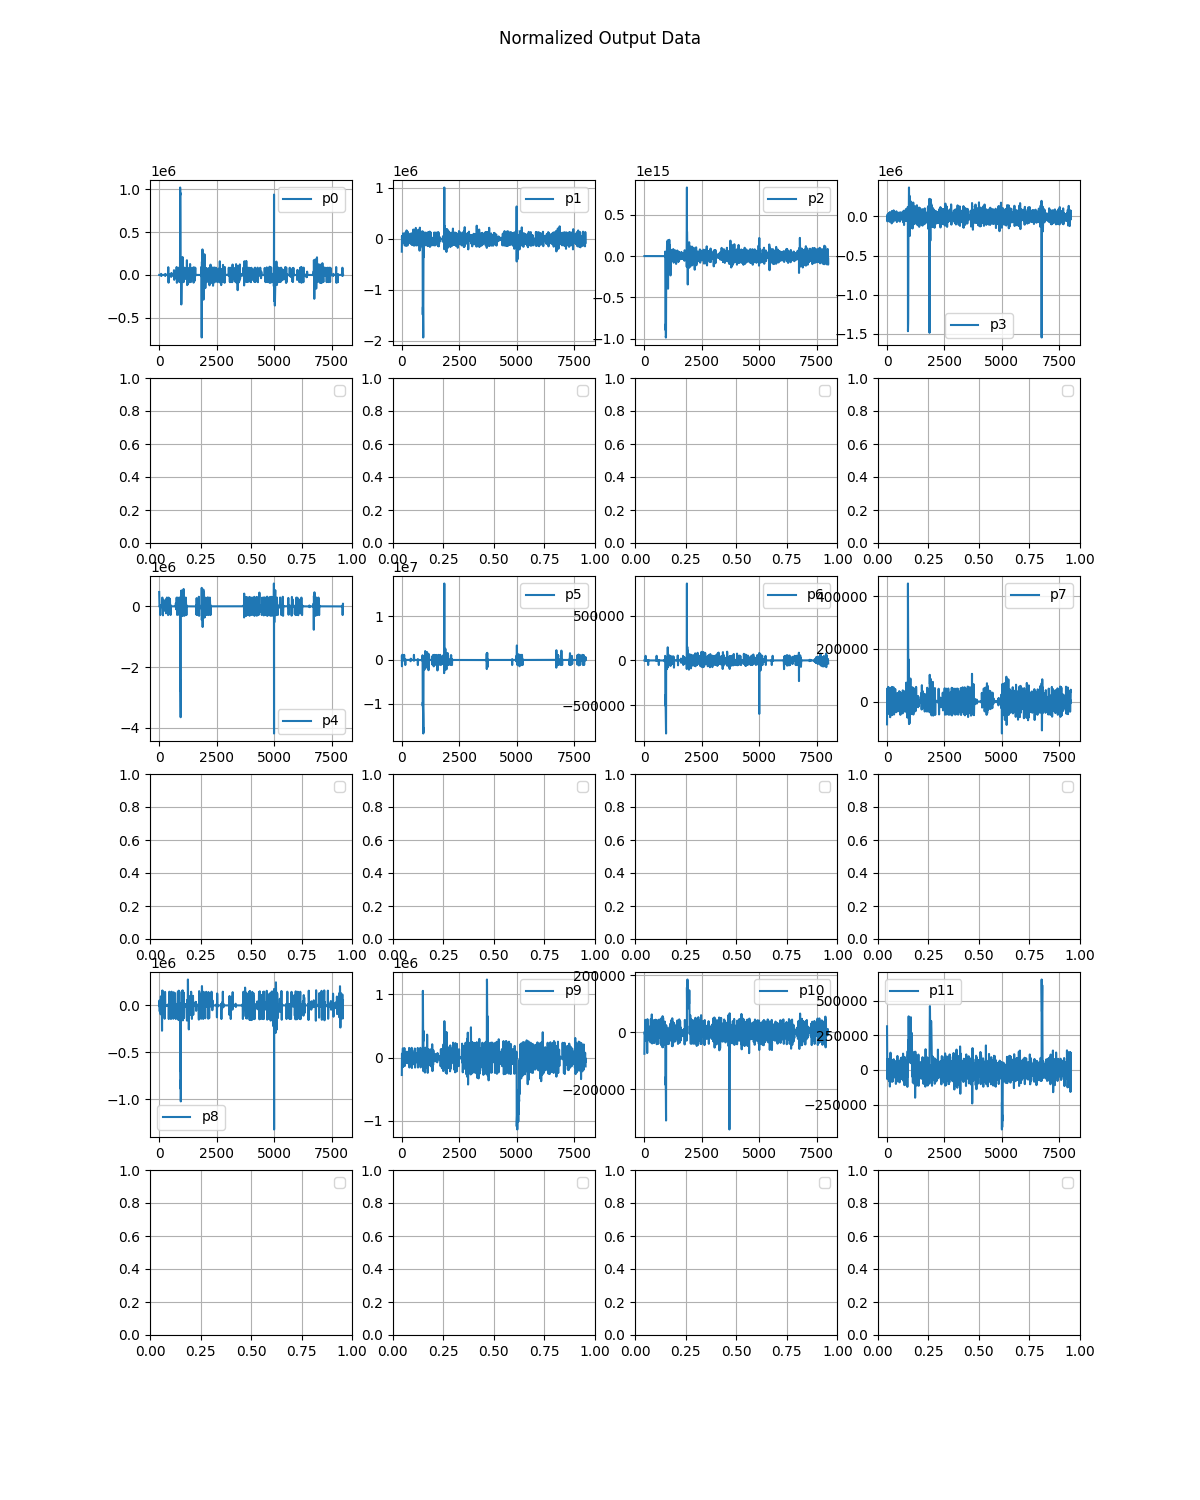

In [26]:
# plot the normalized outputs
%matplotlib widget
import matplotlib.pyplot as plt
fig, axs = plt.subplots(6, 4)
fig.set_size_inches(12, 15)
fig.suptitle('Normalized Output Data')
start = 0
end = 8000

all_outputs_normalized_filtered = np.load(f"{path_to_all_csvs}/smooth_all_outputs_normalized_filtered.npy")

axs[0, 0].plot(all_outputs_normalized_filtered[start:end,0], label='p0')
axs[0, 1].plot(all_outputs_normalized_filtered[start:end,1], label='p1')
axs[0, 2].plot(all_outputs_normalized_filtered[start:end,2], label='p2')
axs[0, 3].plot(all_outputs_normalized_filtered[start:end,3], label='p3')

# axs[1, 0].plot(all_outputs_normalized_filtered[start:end,12], label='udot0')
# axs[1, 1].plot(all_outputs_normalized_filtered[start:end,13], label='vdot0')
# axs[1, 2].plot(all_outputs_normalized_filtered[start:end,18], label='u0')
# axs[1, 3].plot(all_outputs_normalized_filtered[start:end,19], label='v0')

axs[2, 0].plot(all_outputs_normalized_filtered[start:end,4], label='p4')
axs[2, 1].plot(all_outputs_normalized_filtered[start:end,5], label='p5')
axs[2, 2].plot(all_outputs_normalized_filtered[start:end,6], label='p6')
axs[2, 3].plot(all_outputs_normalized_filtered[start:end,7], label='p7')

# axs[3, 0].plot(all_outputs_normalized_filtered[start:end,14], label='udot1')
# axs[3, 1].plot(all_outputs_normalized_filtered[start:end,15], label='vdot1')
# axs[3, 2].plot(all_outputs_normalized_filtered[start:end,20], label='u1')
# axs[3, 3].plot(all_outputs_normalized_filtered[start:end,21], label='v1')

axs[4, 0].plot(all_outputs_normalized_filtered[start:end,8], label='p8')
axs[4, 1].plot(all_outputs_normalized_filtered[start:end,9], label='p9')
axs[4, 2].plot(all_outputs_normalized_filtered[start:end,10], label='p10')
axs[4, 3].plot(all_outputs_normalized_filtered[start:end,11], label='p11')

# axs[5, 0].plot(all_outputs_normalized_filtered[start:end,16], label='udot2')
# axs[5, 1].plot(all_outputs_normalized_filtered[start:end,17], label='vdot2')
# axs[5, 2].plot(all_outputs_normalized_filtered[start:end,22], label='u2')
# axs[5, 3].plot(all_outputs_normalized_filtered[start:end,23], label='v2')

for ax in axs.flat:
    ax.legend()
    ax.grid(True)

In [23]:
import numpy as np
# paths = ["/home/daniel/Documents/data/daniel_baloo_data_collection/CIRCLES/parsed_csvs/", "/home/daniel/Documents/data/daniel_baloo_data_collection/STAR/parsed_csvs/", "/home/daniel/Documents/data/daniel_baloo_data_collection/STEPCMDS/parsed_csvs/"]
# paths = ["/home/daniel/Documents/data/daniel_baloo_data_collection/filtered_pressure_commands/STEPCMDS/parsed_csvs/"]
paths = ["/home/daniel/Documents/data/daniel_baloo_data_collection/noisy_pressure_data/parsed_csvs/"]


input_arrays = []
output_arrays = []

for path in paths:
    # input_arrays.append(np.load(path + "smooth_all_inputs_normalized_filtered.npy"))
    # output_arrays.append(np.load(path + "smooth_all_outputs_normalized_filtered.npy"))
    input_arrays.append(np.load(path + "not_smooth_all_inputs_normalized_filtered.npy"))
    output_arrays.append(np.load(path + "not_smooth_all_outputs_normalized_filtered.npy"))

all_inputs_normalized = np.concatenate(input_arrays, axis=0)
all_outputs_normalized = np.concatenate(output_arrays, axis=0)

from sklearn.model_selection import train_test_split

train_size = int(0.80*all_inputs_normalized.shape[0])
validation_size = int(0.20*all_inputs_normalized.shape[0])

# train_inputs, val_inputs, train_outputs, val_outputs = train_test_split(all_inputs_normalized, all_outputs_normalized, test_size=validation_size, random_state=42)

train_inputs = all_inputs_normalized[:train_size]
val_inputs = all_inputs_normalized[train_size:]
train_outputs = all_outputs_normalized[:train_size]
val_outputs = all_outputs_normalized[train_size:]

np.save("/home/daniel/catkin_ws/src/moldy/case_studies/baloo_left_hw/data/gooddata/raw/validation_inputdata.npy", val_inputs)
np.save("/home/daniel/catkin_ws/src/moldy/case_studies/baloo_left_hw/data/gooddata/raw/validation_outputdata.npy", val_outputs)
np.save("/home/daniel/catkin_ws/src/moldy/case_studies/baloo_left_hw/data/gooddata/raw/train_inputdata.npy", train_inputs)
np.save("/home/daniel/catkin_ws/src/moldy/case_studies/baloo_left_hw/data/gooddata/raw/train_outputdata.npy", train_outputs)
np.save("/home/daniel/catkin_ws/src/moldy/case_studies/baloo_left_hw/data/gooddata/raw/output_max.npy", output_max)


# np.save("/home/daniel/catkin_ws/src/moldy/case_studies/grub_hw_copy/data/good_data/not_smoothed_data/validation_inputdata.npy", val_inputs)
# np.save("/home/daniel/catkin_ws/src/moldy/case_studies/grub_hw_copy/data/good_data/not_smoothed_data/validation_outputdata.npy", val_outputs)
# np.save("/home/daniel/catkin_ws/src/moldy/case_studies/grub_hw_copy/data/good_data/not_smoothed_data/train_inputdata.npy", train_inputs)
# np.save("/home/daniel/catkin_ws/src/moldy/case_studies/grub_hw_copy/data/good_data/not_smoothed_data/train_outputdata.npy", train_outputs)
# np.save("/home/daniel/catkin_ws/src/moldy/case_studies/grub_hw_copy/data/good_data/not_smoothed_data/output_max.npy", output_max)

print(train_inputs.shape, val_inputs.shape, train_outputs.shape, val_outputs.shape)


(1361345, 36) (340337, 36) (1361345, 24) (340337, 24)
